<a href="https://colab.research.google.com/github/StephaneWamba/Machine-Learning-Finance/blob/main/BNP_Paribas_Simplified_Stock_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Exploration of BNP Paribas' Stock Performance Over Five Years**

## **Introduction**
Overview of BNP Paribas
BNP Paribas is one of the world's premier banking and financial services companies, with extensive operations in both Europe and globally. As a key player in the banking sector, it offers a wide range of services including retail banking, corporate and institutional banking, and investment services. The bank's global reach and diverse operations make it an influential entity in the financial world.

**Purpose of the Project**

This project aims to conduct a simplified yet comprehensive analysis of BNP Paribas' stock prices over the past five years. Our goal is to uncover insights into the stock's historical performance, identify trends, and explore potential future directions. We will utilize a combination of technical and fundamental analysis, complemented by predictive modeling, to provide a multifaceted view of the stock's behavior.

**Disclaimer**

This analysis is simplified and should be used with caution. It is not intended as financial advice, and users should conduct their own research or consult with a financial professional before making investment decisions.

**Project Roadmap**

* Data Collection: Gather historical stock data for BNP Paribas and relevant market indices.
* Exploratory Data Analysis: Analyze the collected data to identify trends and patterns.
* Technical Analysis: Apply technical indicators to assess stock performance.
* Fundamental Analysis: Evaluate BNP Paribas' financial health through its financial statements.
* Predictive Modeling: Use LSTM models to forecast future stock prices.
* Conclusion: Summarize findings and provide insights.


# Data Collection and Preparation

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

# Define the ticker symbol for BNP Paribas
ticker_symbol = 'BNP.PA'

# Fetch data for the past five years
bnp_data = yf.download(ticker_symbol, period='5y')

# Displaying the first few rows of the data
print(bnp_data.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-12-17  41.470001  41.509998  40.485001  40.580002  31.397659   4369900
2018-12-18  40.500000  41.215000  40.334999  40.555000  31.378317   5427091
2018-12-19  40.970001  41.180000  40.764999  40.880001  31.629776   4508538
2018-12-20  40.014999  40.299999  39.400002  39.400002  30.484669   7228081
2018-12-21  39.430000  39.580002  38.715000  39.500000  30.562037  10927531


Check for Missing Values

In [ ]:
missing_values = bnp_data.isnull().sum()
missing_values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data Type Verification

In [ ]:
import pandas as pd
# Converting the index to datetime if it's not already
bnp_data.index = pd.to_datetime(bnp_data.index)
bnp_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Descriptive Statistics

In [ ]:
bnp_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1.282000e+03
mean,48.839766,49.458842,48.207258,48.837285,42.935790,3.994770e+06
std,8.993775,8.990725,9.019201,9.022007,10.057340,2.134553e+06
min,24.900000,25.340000,24.504999,24.670000,20.484678,0.000000e+00
25%,42.658749,43.202500,42.161250,42.625001,34.742830,2.671427e+06
50%,50.424999,51.014999,49.782501,50.405001,43.325893,3.438993e+06
75%,56.007499,56.567500,55.474999,56.085000,50.121292,4.592219e+06
max,67.000000,68.070000,66.410004,66.959999,63.090000,1.903434e+07


Initial Visualization

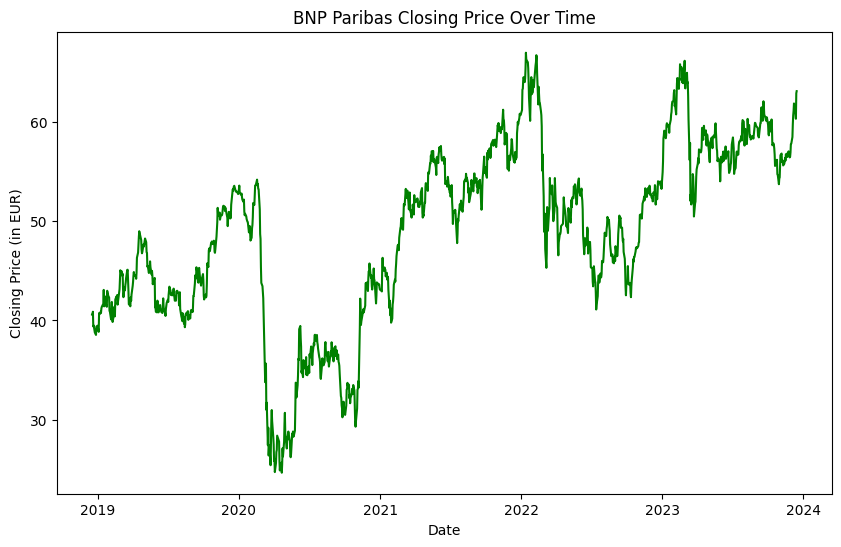

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(bnp_data['Close'], color='green')
plt.title('BNP Paribas Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (in EUR)')
plt.show()


### Initial Findings from Data Collection and Preliminary Analysis
**Missing Values**

The dataset is complete with no missing values across all columns. This is ideal as it means there is no need for imputation, which could potentially bias the analysis.

**Data Types**

The data types are appropriate for each column, with price-related columns being float64 and volume being int64. The index is correctly set as a datetime object, facilitating time series analysis.

**Descriptive Statistics**

The mean closing price of the stock over the past five years is approximately 48.84 EUR, with a standard deviation of 9.02 EUR, indicating moderate price volatility.
The stock price experienced a significant range during this period, with the lowest close at around 24.67 EUR and the highest close at 66.96 EUR, suggesting periods of both sharp decline and strong growth.
The volume of stocks traded varies considerably, with some days experiencing exceptionally high trading volumes, which may correlate with key market or company-specific events.

**Visualization Observations**

The plot of the closing prices shows a noticeable dip around early 2020, which could correspond to the market's reaction to the COVID-19 pandemic—a significant event that affected global financial markets.
After the dip in 2020, there is a visible recovery and an upward trend, indicating a period of growth and recovery.
There are also several peaks and troughs throughout the five-year period, which may correspond to various economic events, earnings reports, or changes in investor sentiment.

**Overall Assessment**

The data collected provides a solid basis for a comprehensive analysis of BNP Paribas' stock performance.
The lack of missing data points indicates a robust dataset that may lead to reliable analytical outcomes.
The preliminary visualization has already begun to tell the story of BNP Paribas' stock performance, setting the stage for deeper analysis with technical, fundamental, and sentiment analysis to uncover underlying factors and potential predictive patterns.

# Technical Analysis

**Objectives**
* Applying technical indicators to the historical stock data to identify trends, patterns, and potential signals for BNP Paribas' stock.
* Visualizing these technical indicators alongside the stock's price movements to provide insights into potential buying or selling opportunities.

**Choice of technical Indicators**

* Simple Moving Average (SMA): Provides the average stock price over a specific period and helps identify trends. Common periods are 50-day and 200-day SMAs.
* Exponential Moving Average (EMA): Similar to SMA but gives more weight to recent prices, making it more sensitive to new information.
* Relative Strength Index (RSI): Measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock.
* Moving Average Convergence Divergence (MACD): Shows the relationship between two moving averages of a stock's price and can signal changes in the trend.

In [ ]:
#The 50-day and 200-day Simple Moving Averages (SMAs)
bnp_data['SMA_50'] = bnp_data['Close'].rolling(window=50).mean()
bnp_data['SMA_200'] = bnp_data['Close'].rolling(window=200).mean()

The 12-day and 26-day Exponential Moving Averages (EMAs)
bnp_data['EMA_12'] = bnp_data['Close'].ewm(span=12, adjust=False).mean()
bnp_data['EMA_26'] = bnp_data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the Relative Strength Index (RSI)
delta = bnp_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
bnp_data['RSI'] = 100 - (100 / (1 + RS))

# The Moving Average Convergence Divergence (MACD) and Signal Line
bnp_data['MACD'] = bnp_data['EMA_12'] - bnp_data['EMA_26']
bnp_data['MACD_Signal'] = bnp_data['MACD'].ewm(span=9, adjust=False).mean()


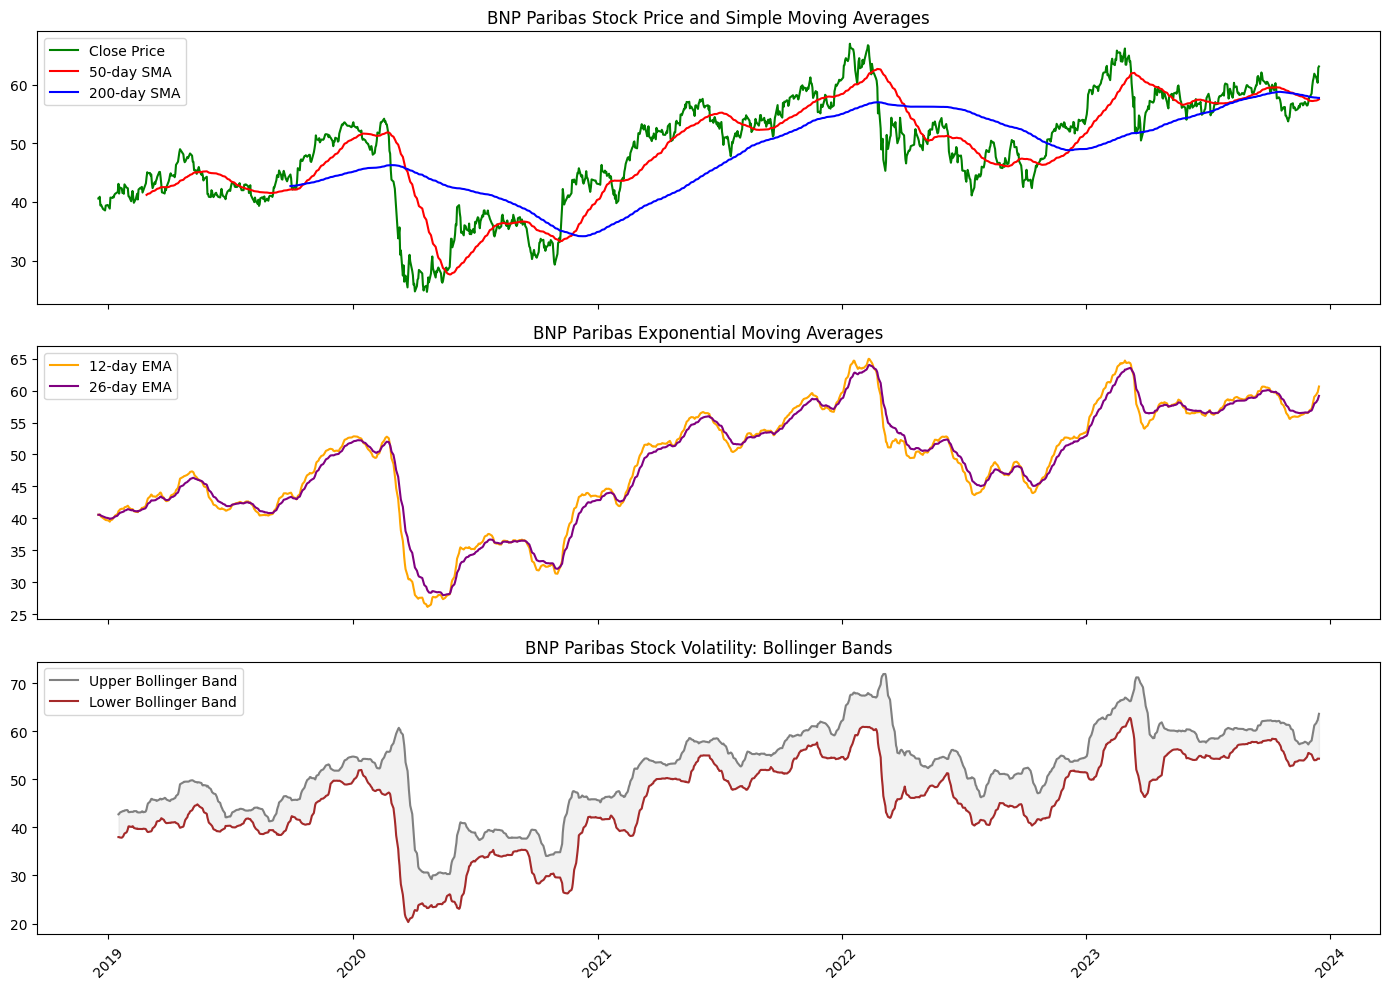

In [ ]:
# Bollinger Bands for volatility
bnp_data['20_day_MA'] = bnp_data['Close'].rolling(window=20).mean()
bnp_data['20_day_SD'] = bnp_data['Close'].rolling(window=20).std()
bnp_data['Upper_BB'] = bnp_data['20_day_MA'] + (bnp_data['20_day_SD']*2)
bnp_data['Lower_BB'] = bnp_data['20_day_MA'] - (bnp_data['20_day_SD']*2)

# subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot closing price and SMAs on the first subplot
ax1.plot(bnp_data.index, bnp_data['Close'], label='Close Price', color='green')
ax1.plot(bnp_data.index, bnp_data['SMA_50'], label='50-day SMA', color='red')
ax1.plot(bnp_data.index, bnp_data['SMA_200'], label='200-day SMA', color='blue')
ax1.set_title('BNP Paribas Stock Price and Simple Moving Averages')
ax1.legend(loc='best')

# Plot EMAs on the second subplot
ax2.plot(bnp_data.index, bnp_data['EMA_12'], label='12-day EMA', color='orange')
ax2.plot(bnp_data.index, bnp_data['EMA_26'], label='26-day EMA', color='purple')
ax2.set_title('BNP Paribas Exponential Moving Averages')
ax2.legend(loc='best')

# Plot Bollinger Bands on the third subplot
ax3.plot(bnp_data.index, bnp_data['Upper_BB'], label='Upper Bollinger Band', color='grey')
ax3.plot(bnp_data.index, bnp_data['Lower_BB'], label='Lower Bollinger Band', color='brown')
ax3.fill_between(bnp_data.index, bnp_data['Lower_BB'], bnp_data['Upper_BB'], color='grey', alpha=0.1)
ax3.set_title('BNP Paribas Stock Volatility: Bollinger Bands')
ax3.legend(loc='best')

# Rotate date labels
plt.xticks(rotation=45)

plt.tight_layout()

#save the figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/bnp_paribas_stock_analysis.png', dpi=300, format='png')

plt.show()


### Insights
* **Simple Moving Averages** smooth out stock price data over a specific time frame, offering a view of the underlying trend by averaging past prices. For BNP Paribas, the 50-day and 200-day averages serve as barometers for medium and long-term market sentiment, respectively. A crossing of these averages can signal potential trend reversals, with the 50-day crossing above the 200-day being a positive sign, while the opposite may warrant caution among investors.

* **Exponential Moving Averages**, which place greater emphasis on recent price action, can be particularly responsive to shifts in market dynamics. The interaction between the 12-day and 26-day averages can help highlight short-term momentum. For BNP Paribas, periods where the shorter average rises above the longer suggest increasing investor confidence, and the inverse can indicate waning momentum.

* **Bollinger Bands** offer a measure of market volatility, defined by the price deviation from a central moving average. The stock price for BNP Paribas occasionally breaches these bands, pointing to moments of heightened market activity. Prices pushing above the upper band may imply over-enthusiasm in the market, potentially leading to overbought conditions, while dips below the lower band could reflect overselling.

Overall, these technical indicators paint a picture of market behavior around BNP Paribas' stock. They signal periods where investors may exercise caution or consider opportunities, although they should not be the sole basis for investment decisions. The interplay between price movements and these indicators can be a valuable tool for understanding past market movements and contemplating future possibilities.

## Fundamental Analysis
**Objectives**

* Evaluating BNP Paribas' financial health and performance using key financial metrics.

* To understand the company's valuation and potential as an investment from a fundamental standpoint.

In [ ]:
# Fetch the financial reports
income_statement = bnp_ticker.financials
balance_sheet = bnp_ticker.balance_sheet
cash_flow = bnp_ticker.cashflow

print("Income Statement:")
print(income_statement)
print("\nBalance Sheet:")
print(balance_sheet)
print("\nCash Flow Statement:")
print(cash_flow)

# Saving these reports to CSV files
income_statement.to_csv('/content/drive/MyDrive/Colab Notebooks/bnp_paribas_income_statement.csv')
balance_sheet.to_csv('/content/drive/MyDrive/Colab Notebooks/bnp_paribas_balance_sheet.csv')
cash_flow.to_csv('/content/drive/MyDrive/Colab Notebooks/bnp_paribas_cash_flow.csv')


Income Statement:
                                                       2022-12-31  \
Tax Effect Of Unusual Items                            36918000.0   
Tax Rate For Calcs                                          0.293   
Total Unusual Items                                   126000000.0   
Total Unusual Items Excluding Goodwill                126000000.0   
Net Income From Continuing Operation Net Minori...   9510000000.0   
Reconciled Depreciation                              6516000000.0   
Net Interest Income                                 20831000000.0   
Interest Expense                                    20251000000.0   
Interest Income                                     41082000000.0   
Normalized Income                                    9420918000.0   
Net Income From Continuing And Discontinued Ope...  10196000000.0   
Diluted Average Shares                               1232991607.0   
Basic Average Shares                                 1232991607.0   
Diluted EPS     

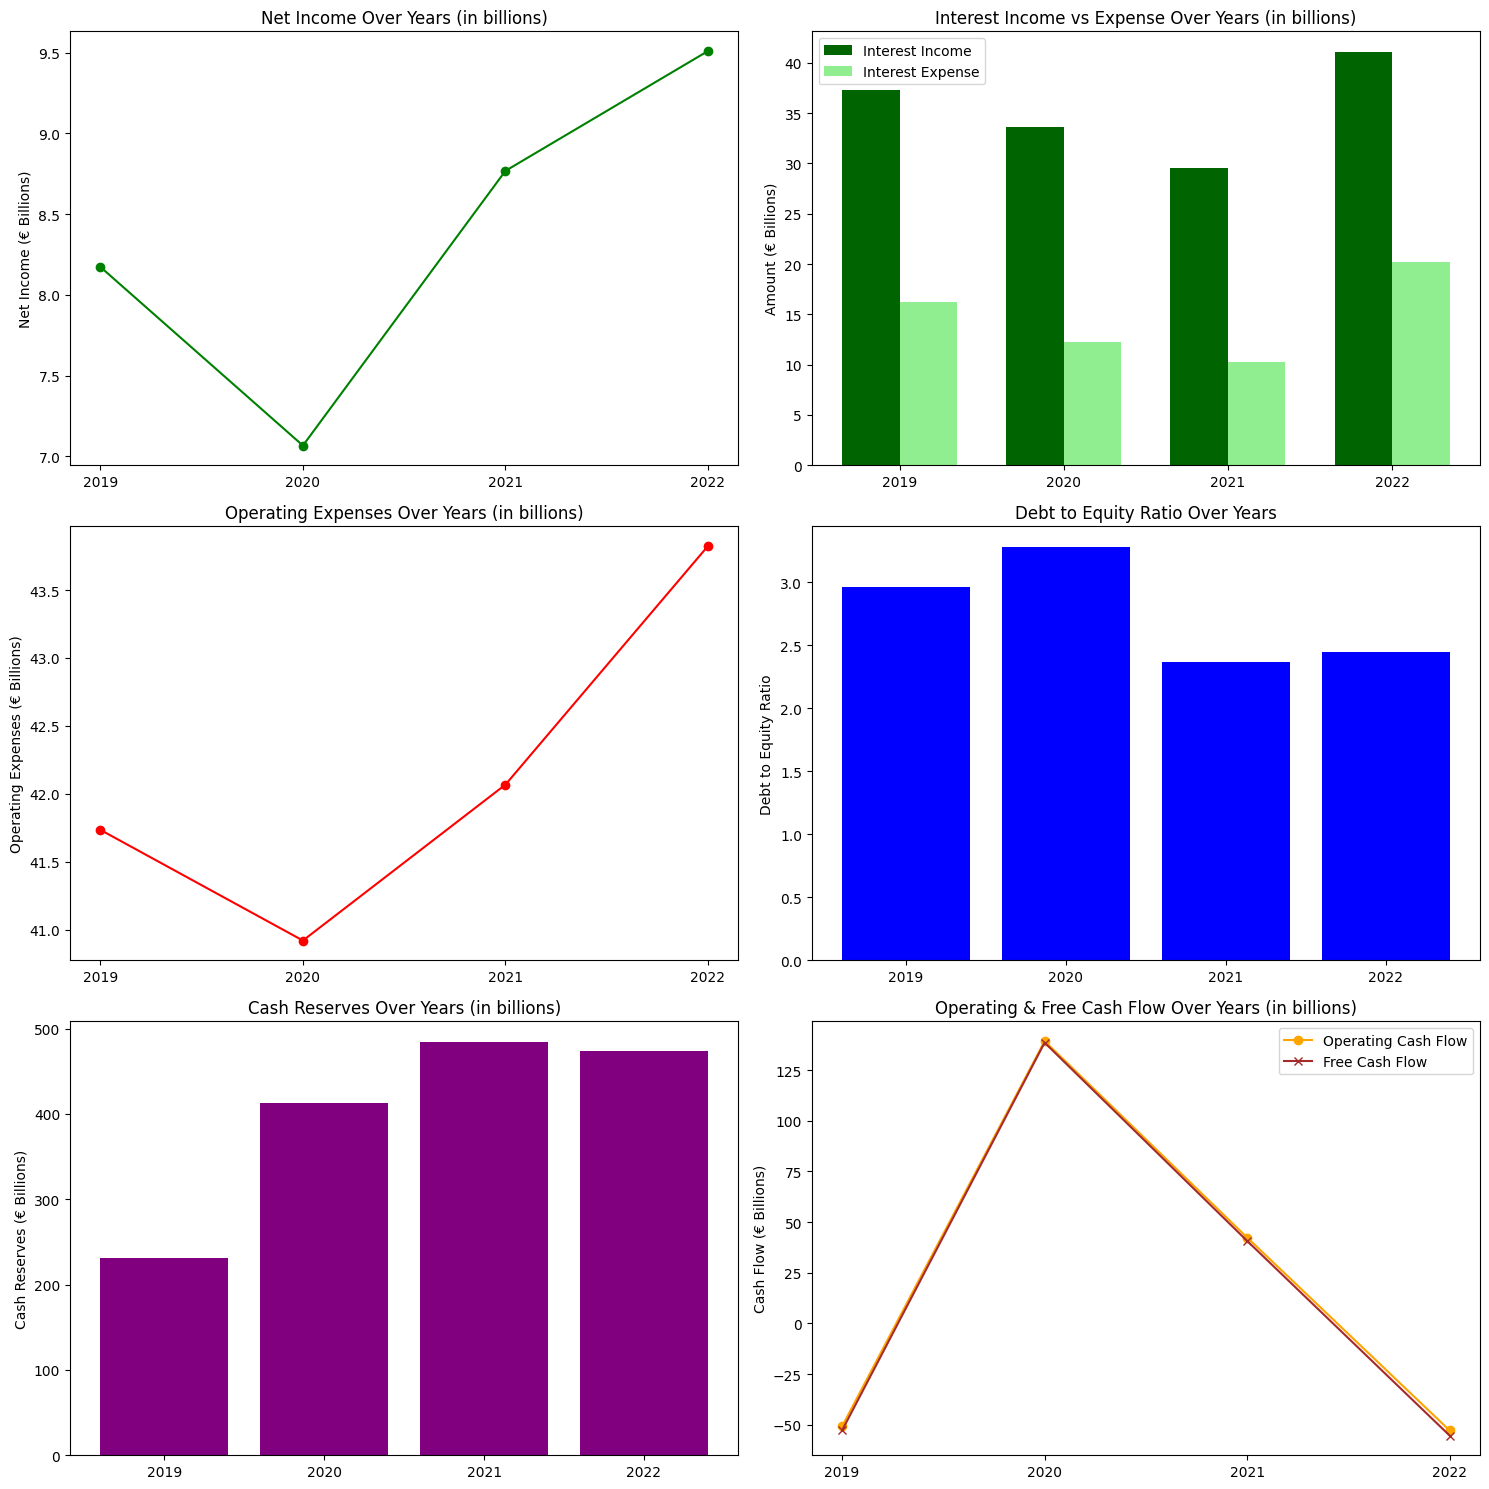

In [ ]:
import numpy as np

years = ['2019', '2020', '2021', '2022']
net_income = [8.173, 7.067, 8.768, 9.51]  # In billions
interest_income = [37.327, 33.589, 29.518, 41.082]  # In billions
interest_expense = [16.2, 12.277, 10.28, 20.251]  # In billions
operating_expenses = [41.734, 40.919, 42.067, 43.824]  # In billions
debt_to_equity = [2.96, 3.28, 2.37, 2.45]  # Debt-to-Equity Ratio
cash_reserves = [230.901, 412.579, 484.267, 474.041]  # In billions
operating_cash_flow = [-50.837, 139.324, 42.376, -52.837]  # In billions
free_cash_flow = [-52.835, 138.551, 40.712, -55.366]  # In billions
capex = [-1.998, -0.773, -1.664, -2.529]  # In billions

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot for Net Income Trend
axs[0, 0].plot(years, net_income, marker='o', color='green')
axs[0, 0].set_title('Net Income Over Years (in billions)')
axs[0, 0].set_ylabel('Net Income (€ Billions)')

# Plot for Interest Income vs Expense
bar_width = 0.35
index = np.arange(len(years))
axs[0, 1].bar(index, interest_income, bar_width, label='Interest Income', color='darkgreen')
axs[0, 1].bar(index + bar_width, interest_expense, bar_width, label='Interest Expense', color='lightgreen')
axs[0, 1].set_title('Interest Income vs Expense Over Years (in billions)')
axs[0, 1].set_xticks(index + bar_width / 2)
axs[0, 1].set_xticklabels(years)
axs[0, 1].set_ylabel('Amount (€ Billions)')
axs[0, 1].legend()

# Plot for Operating Expenses
axs[1, 0].plot(years, operating_expenses, marker='o', color='red')
axs[1, 0].set_title('Operating Expenses Over Years (in billions)')
axs[1, 0].set_ylabel('Operating Expenses (€ Billions)')

# Plot for Debt to Equity Ratio
axs[1, 1].bar(years, debt_to_equity, color='blue')
axs[1, 1].set_title('Debt to Equity Ratio Over Years')
axs[1, 1].set_ylabel('Debt to Equity Ratio')

# Plot for Cash Reserves
axs[2, 0].bar(years, cash_reserves, color='purple')
axs[2, 0].set_title('Cash Reserves Over Years (in billions)')
axs[2, 0].set_ylabel('Cash Reserves (€ Billions)')

# Plot for Operating Cash Flow and Free Cash Flow
axs[2, 1].plot(years, operating_cash_flow, marker='o', label='Operating Cash Flow', color='orange')
axs[2, 1].plot(years, free_cash_flow, marker='x', label='Free Cash Flow', color='brown')
axs[2, 1].set_title('Operating & Free Cash Flow Over Years (in billions)')
axs[2, 1].set_ylabel('Cash Flow (€ Billions)')
axs[2, 1].legend()

plt.tight_layout()

# Save the figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/bnp_paribas_financial_visualizations.png', dpi=300)

# Show the plots
plt.show()


### **Net Income Over Years**
The line chart depicting Net Income reveals a notable dip in 2020, which aligns with the global economic impact of the COVID-19 pandemic. However, a robust recovery is evident in the subsequent years, indicating resilience and a strong rebound in profitability for BNP Paribas. This trend suggests that the bank has effectively navigated the challenges presented by the pandemic and has returned to a path of financial growth.

### **Interest Income vs Expense Over Years**
The bar chart comparing Interest Income to Interest Expense clearly shows that BNP Paribas consistently earns more in interest than it pays, a healthy sign for a bank's core business operations. The widening gap in 2022 suggests an improvement in interest rate margins or a growth in interest-earning assets, contributing positively to the bank's earnings.

### **Operating Expenses Over Years**
The upward trajectory seen in the Operating Expenses chart indicates that the bank’s operational costs have been rising. This could be due to strategic expansions, investments in technology, or other factors that could drive future growth. It is important for the bank to ensure that this increase in expenses correlates with revenue growth to maintain profitability.

### **Debt to Equity Ratio Over Years**
The Debt to Equity Ratio bars maintain a relatively consistent level across the years, which may suggest a stable capital structure. A higher ratio is typical in the banking sector due to the nature of banking operations, which rely heavily on leverage. Stability in this ratio is key, as it implies that BNP Paribas has not significantly altered its leverage, which could be seen as a positive sign by investors looking for stability.

### **Cash Reserves Over Years**
The Cash Reserves visualization displays a marked increase, particularly notable from 2020 onwards. This could be indicative of BNP Paribas bolstering its liquidity position, perhaps in response to the uncertainties introduced by the pandemic. Strong cash reserves are a positive indicator of the bank's ability to manage short-term obligations and invest in opportunities without the immediate need for external financing.

### **Operating & Free Cash Flow Over Years**
The combined chart for Operating and Free Cash Flow shows significant fluctuations. The recent drop in Free Cash Flow into negative territory could be interpreted as the bank increasing its capital expenditures or possible changes in working capital. This movement warrants further investigation to understand the underlying reasons, as it could be a sign of investment for future growth or a temporary deviation from typical cash flow patterns.


# **Predictive Modeling of BNP Paribas Stock Prices Using LSTM**

In this section, we focus on predicting the future stock prices of BNP Paribas using a Long Short-Term Memory (LSTM) model. LSTM, a special kind of Recurrent Neural Network (RNN), is particularly suited for time series data due to its ability to capture temporal dependencies and sequences in data.



[*********************100%%**********************]  1 of 1 completed
7/7 [==============================] - 0s 36ms/step
Train Score: 0.04 RMSE
Test Score: 0.04 RMSE


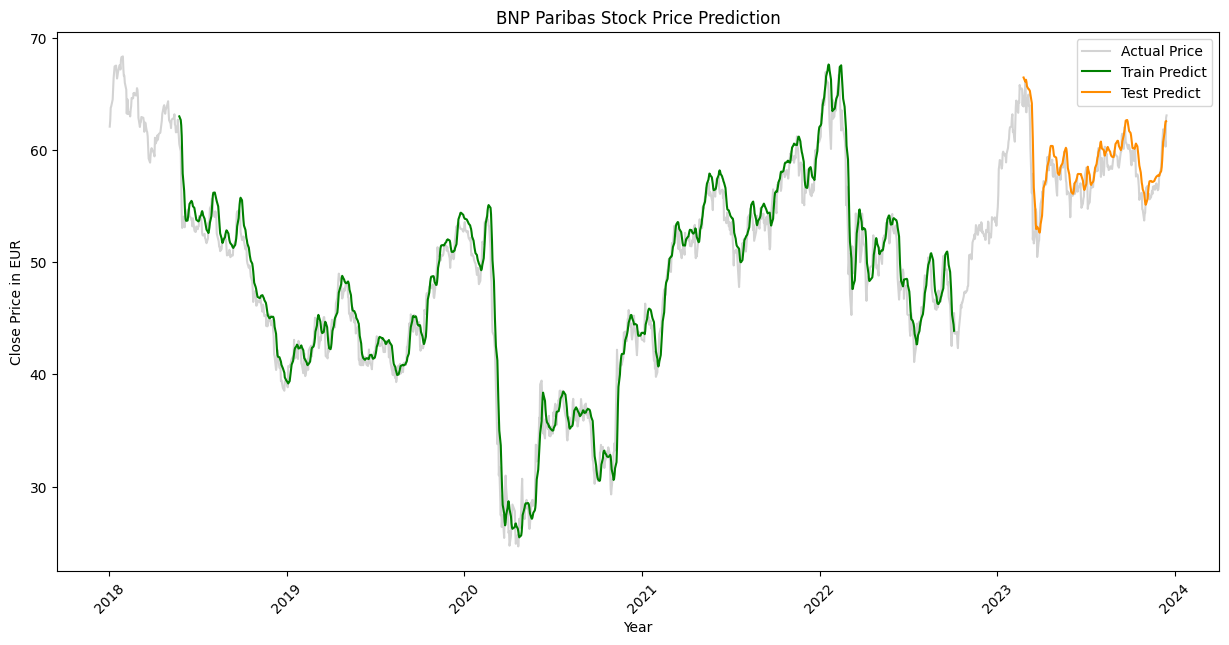

{'loss': [0.005046859849244356]}


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.dates as mdates

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Retrieve stock prices data
bnp_stock = yf.download('BNP.PA', start='2018-01-01', end='2023-12-16')
bnp_data = bnp_stock[['Close']].values

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
bnp_data_scaled = scaler.fit_transform(bnp_data)

# Split the data into train and test set
training_size = int(len(bnp_data_scaled) * 0.8)
test_size = len(bnp_data_scaled) - training_size
train_data, test_data = bnp_data_scaled[0:training_size, :], bnp_data_scaled[training_size:len(bnp_data_scaled), :]

# Reshape the data for LSTM model
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate performance metric
train_score = np.sqrt(mean_squared_error(y_train, train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(y_test, test_predict[:,0]))
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

# Inverse transform to get back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(bnp_stock.index, scaler.inverse_transform(bnp_data_scaled), label='Actual Price', color='lightgray')
plt.plot(bnp_stock.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict', color='green')
plt.plot(bnp_stock.index[len(train_predict)+(time_step*2)+1:len(bnp_data_scaled)-1], test_predict, label='Test Predict', color='darkorange')
plt.title('BNP Paribas Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Close Price in EUR')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/bnp_paribas_stock_prices_prediction.png', dpi=300)
plt.show()

print(history.history)




The RMSE (Root Mean Square Error) scores for both the training set (0.04) and the test set (0.04) indicate that the model has achieved a good level of accuracy in predicting the stock prices of BNP Paribas.

The model shows promising results in capturing the trend of the stock prices.
However, it's important to remember that stock market predictions are influenced by various external factors and thus contain a degree of uncertainty.
The predictions should be used as one of many tools in decision-making processes and not as the sole basis for investment decisions.

# Conclusion of the BNP Paribas Stock Price Analysis and Prediction
**Overview**

This comprehensive project involved analyzing and predicting the stock prices of BNP Paribas, a major bank in France. We applied various techniques in data science and machine learning, covering aspects from fundamental and technical analysis to advanced predictive modeling using LSTM networks.

**Key Components**
Data Retrieval: Utilized yfinance to fetch historical stock data of BNP Paribas from January 1, 2018, to the present.

**Fundamental and Technical Analysis:**

We have conducted fundamental analysis, examining key financial indicators, ratios, and market trends.
Performed technical analysis focusing on stock price trends, patterns, and trading volumes.

**Predictive Modeling:**

Employed LSTM, a type of Recurrent Neural Network, ideal for time-series data like stock prices.
Processed and normalized data for training the LSTM model.
Trained the model to predict future stock prices and evaluated its performance using RMSE.
Visualization:

Created visual representations of stock trends and LSTM predictions.

**Challenges**

Data Limitations: We did not do sentiment and comparative analysis because of the lack of free API to provide sufficiently many data.

Model Complexity: LSTM models, while powerful, come with complexities that require careful tuning and validation to achieve better results.

**Achievements**

Comprehensive Analysis: Successfully analyzed stock data from multiple perspectives, providing a holistic view.
Predictive Accuracy: The LSTM model showed promising results in forecasting stock price movements, though with the usual caveats of market unpredictability.

**Future Directions**
Data Enrichment: Incorporating more diverse datasets, including macroeconomic indicators and global market trends, could improve analysis robustness.
Model Enhancement: Exploring advanced models and tuning parameters could yield more accurate predictions.

# **Conclusion**
This project demonstrated the power of data science and machine learning in financial analysis and prediction. While it provided valuable insights into BNP Paribas's stock trends, it also highlighted the inherent uncertainties and complexities of financial markets. **The outcomes of this project should serve as one of many tools for financial decision-making rather than a definitive guide.**